In [2]:
import pandas as pd
# reading dataset
data = pd.read_csv("grid/grid-export.csv")

data.tail()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,2022-08-28,6.20,70.48,16.81,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,2022-08-29,5.39,66.65,15.50,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,2022-08-30,5.11,64.76,14.81,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,2022-08-31,5.58,69.77,15.52,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,2022-09-01,5.63,71.57,16.26,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              439 non-null    object 
 1   PM1(mcg/m³)      439 non-null    float64
 2   PM10(mcg/m³)     439 non-null    float64
 3   PM2.5(mcg/m³)    439 non-null    float64
 4   AQI US           439 non-null    float64
 5   NO(mcg/m³)       439 non-null    float64
 6   NO2(mcg/m³)      439 non-null    float64
 7   CH2O(mcg/m³)     439 non-null    float64
 8   SO2(mcg/m³)      439 non-null    float64
 9   Temperature(°C)  439 non-null    float64
 10  Humidity(%)      439 non-null    float64
dtypes: float64(10), object(1)
memory usage: 37.9+ KB


In [7]:
# Prepring dataset

In [8]:
data['Day'] = pd.to_datetime(data['Day'])

In [ ]:
# Preparing for pm1 training the model and testing it

In [19]:
pm1 = data.drop('PM10(mcg/m³)', axis=1)
pm1 = pm1.drop('PM2.5(mcg/m³)', axis = 1)
pm1 = pm1.drop('Day', axis=1)

In [20]:
X = pm1.drop('PM1(mcg/m³)', axis=1)
Y = pm1['PM1(mcg/m³)']

In [21]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [22]:
import lightgbm as lgb

# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

In [23]:
# Making predictions
reg_pred = model_reg.predict(X_test)

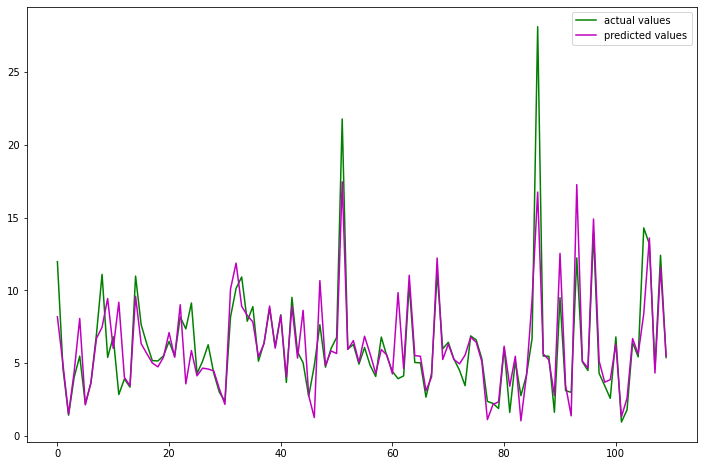

In [24]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [25]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.7120695972045081


In [28]:
# Catboost regressor
# importing the CatBoot Regresspr
from catboost import CatBoostRegressor

# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

Learning rate set to 0.034348
0:	learn: 3.8944973	total: 51.8ms	remaining: 51.7s
1:	learn: 3.8272803	total: 54.9ms	remaining: 27.4s
2:	learn: 3.7682523	total: 57.5ms	remaining: 19.1s
3:	learn: 3.7032582	total: 60ms	remaining: 14.9s
4:	learn: 3.6412468	total: 62.8ms	remaining: 12.5s
5:	learn: 3.5839178	total: 65.7ms	remaining: 10.9s
6:	learn: 3.5205457	total: 69.1ms	remaining: 9.8s
7:	learn: 3.4643367	total: 71.6ms	remaining: 8.88s
8:	learn: 3.4061119	total: 73.3ms	remaining: 8.07s
9:	learn: 3.3581225	total: 74.9ms	remaining: 7.41s
10:	learn: 3.3046848	total: 76.1ms	remaining: 6.84s
11:	learn: 3.2541211	total: 77.4ms	remaining: 6.37s
12:	learn: 3.2060270	total: 79ms	remaining: 6s
13:	learn: 3.1550176	total: 80ms	remaining: 5.64s
14:	learn: 3.1057410	total: 81.1ms	remaining: 5.33s
15:	learn: 3.0645767	total: 82.2ms	remaining: 5.05s
16:	learn: 3.0235646	total: 83.2ms	remaining: 4.81s
17:	learn: 2.9805137	total: 84.1ms	remaining: 4.59s
18:	learn: 2.9410677	total: 85ms	remaining: 4.39s
19:	

274:	learn: 0.9718314	total: 362ms	remaining: 954ms
275:	learn: 0.9707173	total: 363ms	remaining: 953ms
276:	learn: 0.9703015	total: 364ms	remaining: 951ms
277:	learn: 0.9699218	total: 365ms	remaining: 949ms
278:	learn: 0.9692533	total: 366ms	remaining: 947ms
279:	learn: 0.9688887	total: 367ms	remaining: 945ms
280:	learn: 0.9677137	total: 368ms	remaining: 943ms
281:	learn: 0.9653997	total: 369ms	remaining: 941ms
282:	learn: 0.9650590	total: 371ms	remaining: 939ms
283:	learn: 0.9620413	total: 371ms	remaining: 937ms
284:	learn: 0.9609995	total: 372ms	remaining: 934ms
285:	learn: 0.9572910	total: 373ms	remaining: 932ms
286:	learn: 0.9569560	total: 375ms	remaining: 931ms
287:	learn: 0.9524616	total: 376ms	remaining: 929ms
288:	learn: 0.9511277	total: 377ms	remaining: 927ms
289:	learn: 0.9487796	total: 378ms	remaining: 925ms
290:	learn: 0.9446741	total: 379ms	remaining: 923ms
291:	learn: 0.9444402	total: 380ms	remaining: 921ms
292:	learn: 0.9441476	total: 381ms	remaining: 919ms
293:	learn: 

442:	learn: 0.7244198	total: 541ms	remaining: 680ms
443:	learn: 0.7242643	total: 542ms	remaining: 679ms
444:	learn: 0.7204154	total: 543ms	remaining: 677ms
445:	learn: 0.7183111	total: 544ms	remaining: 676ms
446:	learn: 0.7169296	total: 545ms	remaining: 674ms
447:	learn: 0.7156347	total: 546ms	remaining: 673ms
448:	learn: 0.7155242	total: 547ms	remaining: 671ms
449:	learn: 0.7153986	total: 548ms	remaining: 670ms
450:	learn: 0.7143035	total: 549ms	remaining: 669ms
451:	learn: 0.7132594	total: 550ms	remaining: 667ms
452:	learn: 0.7122478	total: 551ms	remaining: 666ms
453:	learn: 0.7121428	total: 552ms	remaining: 664ms
454:	learn: 0.7101266	total: 553ms	remaining: 663ms
455:	learn: 0.7085905	total: 554ms	remaining: 661ms
456:	learn: 0.7084789	total: 555ms	remaining: 660ms
457:	learn: 0.7083679	total: 556ms	remaining: 659ms
458:	learn: 0.7064152	total: 558ms	remaining: 657ms
459:	learn: 0.7043360	total: 559ms	remaining: 656ms
460:	learn: 0.7041498	total: 560ms	remaining: 655ms
461:	learn: 

601:	learn: 0.5485548	total: 719ms	remaining: 476ms
602:	learn: 0.5475895	total: 722ms	remaining: 475ms
603:	learn: 0.5459520	total: 723ms	remaining: 474ms
604:	learn: 0.5450731	total: 725ms	remaining: 473ms
605:	learn: 0.5443619	total: 726ms	remaining: 472ms
606:	learn: 0.5430736	total: 727ms	remaining: 471ms
607:	learn: 0.5424160	total: 728ms	remaining: 469ms
608:	learn: 0.5423420	total: 729ms	remaining: 468ms
609:	learn: 0.5419154	total: 730ms	remaining: 467ms
610:	learn: 0.5411538	total: 731ms	remaining: 465ms
611:	learn: 0.5396696	total: 732ms	remaining: 464ms
612:	learn: 0.5382927	total: 733ms	remaining: 463ms
613:	learn: 0.5374798	total: 734ms	remaining: 461ms
614:	learn: 0.5367865	total: 735ms	remaining: 460ms
615:	learn: 0.5364499	total: 737ms	remaining: 459ms
616:	learn: 0.5342340	total: 738ms	remaining: 458ms
617:	learn: 0.5333396	total: 739ms	remaining: 457ms
618:	learn: 0.5312445	total: 742ms	remaining: 457ms
619:	learn: 0.5307210	total: 744ms	remaining: 456ms
620:	learn: 

904:	learn: 0.3390047	total: 1.08s	remaining: 114ms
905:	learn: 0.3386286	total: 1.08s	remaining: 112ms
906:	learn: 0.3383084	total: 1.08s	remaining: 111ms
907:	learn: 0.3378345	total: 1.09s	remaining: 110ms
908:	learn: 0.3375295	total: 1.09s	remaining: 109ms
909:	learn: 0.3366983	total: 1.09s	remaining: 108ms
910:	learn: 0.3362747	total: 1.09s	remaining: 106ms
911:	learn: 0.3357875	total: 1.09s	remaining: 105ms
912:	learn: 0.3353759	total: 1.09s	remaining: 104ms
913:	learn: 0.3346872	total: 1.09s	remaining: 103ms
914:	learn: 0.3345397	total: 1.09s	remaining: 102ms
915:	learn: 0.3340279	total: 1.09s	remaining: 100ms
916:	learn: 0.3338122	total: 1.1s	remaining: 99.2ms
917:	learn: 0.3331004	total: 1.1s	remaining: 98ms
918:	learn: 0.3329080	total: 1.1s	remaining: 96.8ms
919:	learn: 0.3325295	total: 1.1s	remaining: 95.6ms
920:	learn: 0.3323438	total: 1.1s	remaining: 94.4ms
921:	learn: 0.3319384	total: 1.1s	remaining: 93.2ms
922:	learn: 0.3314581	total: 1.1s	remaining: 92ms
923:	learn: 0.33

In [29]:
# making predictions
catboost_pred = CatBoost_rg.predict(X_test)

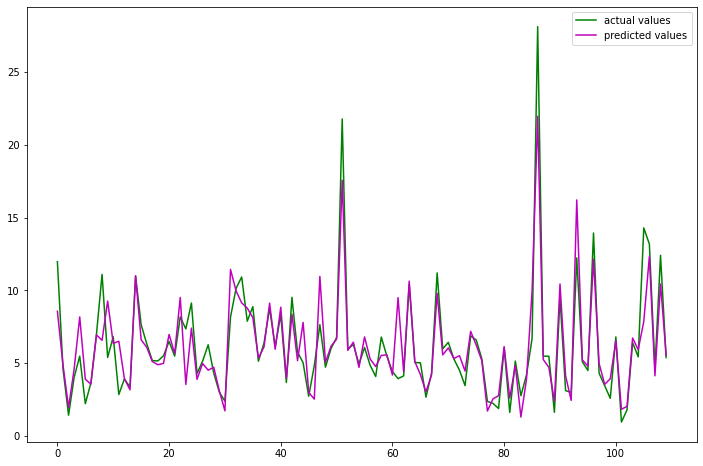

In [30]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [31]:
# calculating the r score 
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.7994283551935555


In [47]:
# importing tensorflow module
import tensorflow as tf

# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
                                 # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])

In [48]:
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [49]:
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 8.9242 - mae: 8.9242
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 7.6445 - mae: 7.6445
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 7.1894 - mae: 7.1894
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 7.0113 - mae: 7.0113
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 6.9263 - mae: 6.9263
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 6.8782 - mae: 6.8782
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 6.8441 - mae: 6.8441
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 6.8138 - mae: 6.8138
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 6.7802 - mae: 6.7802
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 6.7131 - mae: 6.7131
Epoch 11/200
11/11 [==============================] - 0s 3m

11/11 [==============================] - 0s 3ms/step - loss: 1.3149 - mae: 1.3149
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3111 - mae: 1.3111
Epoch 89/200
11/11 [==============================] - 0s 3ms/step - loss: 1.3061 - mae: 1.3061
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3022 - mae: 1.3022
Epoch 91/200
11/11 [==============================] - 0s 3ms/step - loss: 1.3055 - mae: 1.3055
Epoch 92/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2973 - mae: 1.2973
Epoch 93/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2985 - mae: 1.2985
Epoch 94/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2927 - mae: 1.2927
Epoch 95/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2904 - mae: 1.2904
Epoch 96/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2899 - mae: 1.2899
Epoch 97/200
11/11 [==============================] - 0s 3ms/st

11/11 [==============================] - 0s 3ms/step - loss: 1.2225 - mae: 1.2225
Epoch 173/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2183 - mae: 1.2183
Epoch 174/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2226 - mae: 1.2226
Epoch 175/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2135 - mae: 1.2135
Epoch 176/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2146 - mae: 1.2146
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2175 - mae: 1.2175
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2173 - mae: 1.2173
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2183 - mae: 1.2183
Epoch 180/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2220 - mae: 1.2220
Epoch 181/200
11/11 [==============================] - 0s 3ms/step - loss: 1.2114 - mae: 1.2114
Epoch 182/200
11/11 [==============================] -

In [69]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

4/4 [==============================] - 0s 2ms/step
R score is : -0.4351933606199023


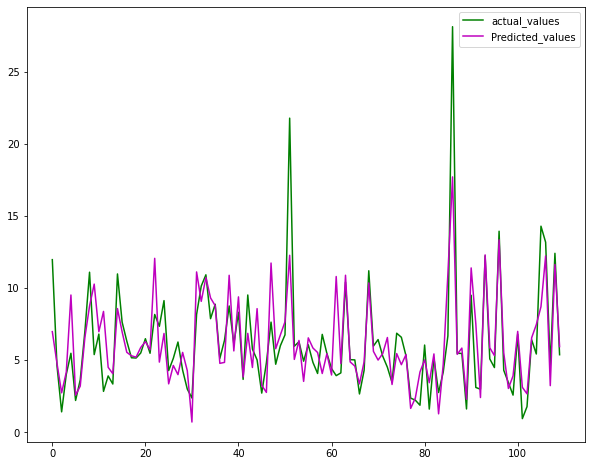

In [52]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [53]:
# pm2.5 regression models


In [60]:
pm2 = data.drop('PM10(mcg/m³)', axis=1)
pm2 = pm2.drop('PM1(mcg/m³)', axis = 1)
pm2 = pm2.drop('Day', axis=1)

In [62]:
X_pm = pm2.drop('PM2.5(mcg/m³)', axis=1)
Y_pm = pm2['PM2.5(mcg/m³)']

In [63]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X_pm, Y_pm, test_size=0.25)


# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

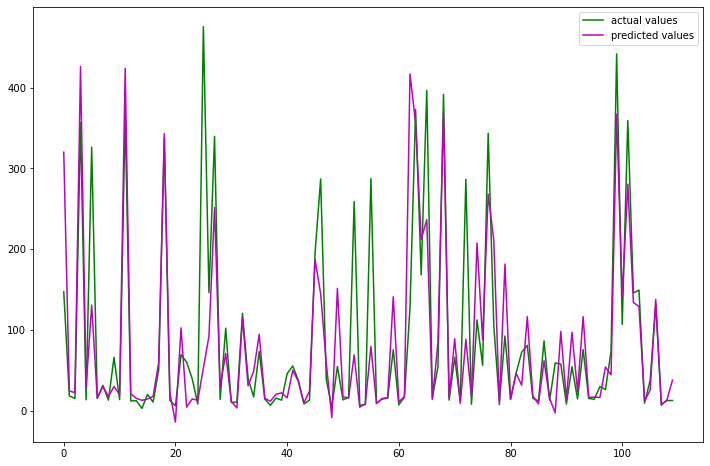

In [64]:
# Making predictions
reg_pred = model_reg.predict(X_test)


# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [65]:
# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.6039299376597229


In [66]:
# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

catboost_pred = CatBoost_rg.predict(X_test)

Learning rate set to 0.034348
0:	learn: 111.0939960	total: 1.92ms	remaining: 1.92s
1:	learn: 109.1347756	total: 3.11ms	remaining: 1.55s
2:	learn: 107.1012350	total: 4.22ms	remaining: 1.4s
3:	learn: 105.1571954	total: 5.26ms	remaining: 1.31s
4:	learn: 103.0228660	total: 6.49ms	remaining: 1.29s
5:	learn: 101.2782070	total: 7.76ms	remaining: 1.29s
6:	learn: 99.5513481	total: 8.95ms	remaining: 1.27s
7:	learn: 97.8634824	total: 10.2ms	remaining: 1.26s
8:	learn: 96.1591077	total: 12ms	remaining: 1.32s
9:	learn: 94.3149259	total: 13.3ms	remaining: 1.31s
10:	learn: 92.5850535	total: 14.7ms	remaining: 1.32s
11:	learn: 90.9263965	total: 18.7ms	remaining: 1.54s
12:	learn: 89.3950221	total: 21ms	remaining: 1.59s
13:	learn: 87.8051123	total: 23ms	remaining: 1.62s
14:	learn: 86.4731691	total: 24.5ms	remaining: 1.61s
15:	learn: 85.2608766	total: 25.9ms	remaining: 1.59s
16:	learn: 83.8012959	total: 27.3ms	remaining: 1.58s
17:	learn: 82.3526207	total: 28.5ms	remaining: 1.56s
18:	learn: 80.8400330	total

301:	learn: 20.9955819	total: 356ms	remaining: 822ms
302:	learn: 20.9712720	total: 357ms	remaining: 821ms
303:	learn: 20.9188453	total: 358ms	remaining: 820ms
304:	learn: 20.8952405	total: 359ms	remaining: 819ms
305:	learn: 20.8620297	total: 360ms	remaining: 818ms
306:	learn: 20.8300659	total: 362ms	remaining: 816ms
307:	learn: 20.8098632	total: 363ms	remaining: 815ms
308:	learn: 20.7493609	total: 364ms	remaining: 813ms
309:	learn: 20.7172759	total: 365ms	remaining: 812ms
310:	learn: 20.6564013	total: 366ms	remaining: 810ms
311:	learn: 20.6346543	total: 367ms	remaining: 809ms
312:	learn: 20.6038434	total: 368ms	remaining: 808ms
313:	learn: 20.5745762	total: 369ms	remaining: 806ms
314:	learn: 20.5234062	total: 370ms	remaining: 805ms
315:	learn: 20.4910267	total: 371ms	remaining: 803ms
316:	learn: 20.4745039	total: 372ms	remaining: 802ms
317:	learn: 20.4437405	total: 373ms	remaining: 801ms
318:	learn: 20.4006731	total: 374ms	remaining: 799ms
319:	learn: 20.3436163	total: 375ms	remaining:

608:	learn: 11.9439836	total: 717ms	remaining: 460ms
609:	learn: 11.9304377	total: 718ms	remaining: 459ms
610:	learn: 11.9104757	total: 719ms	remaining: 458ms
611:	learn: 11.8959609	total: 721ms	remaining: 457ms
612:	learn: 11.8784711	total: 722ms	remaining: 456ms
613:	learn: 11.8710672	total: 723ms	remaining: 454ms
614:	learn: 11.8581636	total: 724ms	remaining: 453ms
615:	learn: 11.8341893	total: 725ms	remaining: 452ms
616:	learn: 11.8205714	total: 726ms	remaining: 451ms
617:	learn: 11.8031703	total: 727ms	remaining: 449ms
618:	learn: 11.7903703	total: 728ms	remaining: 448ms
619:	learn: 11.7824958	total: 729ms	remaining: 447ms
620:	learn: 11.7748044	total: 730ms	remaining: 446ms
621:	learn: 11.7623477	total: 731ms	remaining: 444ms
622:	learn: 11.7110668	total: 732ms	remaining: 443ms
623:	learn: 11.6963193	total: 733ms	remaining: 442ms
624:	learn: 11.6777862	total: 734ms	remaining: 441ms
625:	learn: 11.6682346	total: 735ms	remaining: 439ms
626:	learn: 11.6511592	total: 736ms	remaining:

770:	learn: 9.5343242	total: 899ms	remaining: 267ms
771:	learn: 9.5308767	total: 901ms	remaining: 266ms
772:	learn: 9.4903091	total: 902ms	remaining: 265ms
773:	learn: 9.4596135	total: 903ms	remaining: 264ms
774:	learn: 9.4561642	total: 905ms	remaining: 263ms
775:	learn: 9.4320008	total: 906ms	remaining: 261ms
776:	learn: 9.4128224	total: 907ms	remaining: 260ms
777:	learn: 9.3995649	total: 908ms	remaining: 259ms
778:	learn: 9.3884100	total: 909ms	remaining: 258ms
779:	learn: 9.3662437	total: 910ms	remaining: 257ms
780:	learn: 9.3574695	total: 911ms	remaining: 256ms
781:	learn: 9.3474661	total: 912ms	remaining: 254ms
782:	learn: 9.3393743	total: 913ms	remaining: 253ms
783:	learn: 9.3358601	total: 915ms	remaining: 252ms
784:	learn: 9.3335753	total: 916ms	remaining: 251ms
785:	learn: 9.3063706	total: 917ms	remaining: 250ms
786:	learn: 9.2842627	total: 919ms	remaining: 249ms
787:	learn: 9.2818401	total: 920ms	remaining: 248ms
788:	learn: 9.2732104	total: 922ms	remaining: 246ms
789:	learn: 

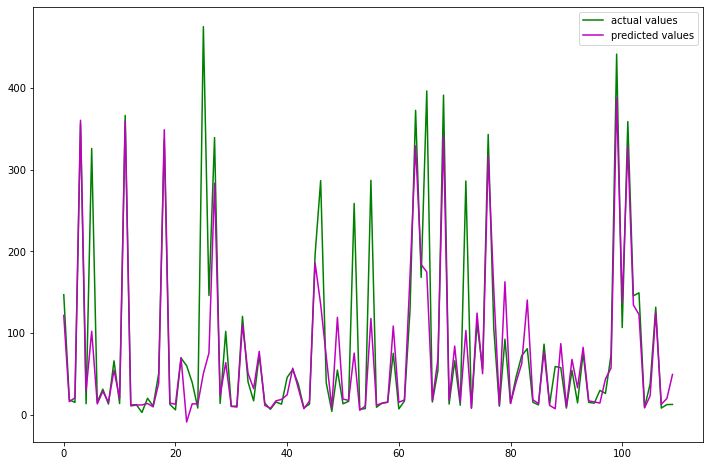

In [67]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [68]:
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.7036898420123997


In [72]:
# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
   
                             # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 98.6838 - mae: 98.6838
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 92.5982 - mae: 92.5982
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 86.9454 - mae: 86.9454
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 81.3682 - mae: 81.3682
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 75.8782 - mae: 75.8782
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 71.1845 - mae: 71.1845
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 67.3621 - mae: 67.3621
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 64.4625 - mae: 64.4625
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 62.0613 - mae: 62.0613
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 59.8984 - mae: 59.8984
Epoch 11/200
11/11 [===================

11/11 [==============================] - 0s 3ms/step - loss: 29.6653 - mae: 29.6653
Epoch 86/200
11/11 [==============================] - 0s 3ms/step - loss: 29.6060 - mae: 29.6060
Epoch 87/200
11/11 [==============================] - 0s 3ms/step - loss: 29.4004 - mae: 29.4004
Epoch 88/200
11/11 [==============================] - 0s 3ms/step - loss: 29.2420 - mae: 29.2420
Epoch 89/200
11/11 [==============================] - 0s 3ms/step - loss: 29.2217 - mae: 29.2217
Epoch 90/200
11/11 [==============================] - 0s 3ms/step - loss: 29.0679 - mae: 29.0679
Epoch 91/200
11/11 [==============================] - 0s 2ms/step - loss: 28.9881 - mae: 28.9881
Epoch 92/200
11/11 [==============================] - 0s 3ms/step - loss: 29.0178 - mae: 29.0178
Epoch 93/200
11/11 [==============================] - 0s 3ms/step - loss: 28.8775 - mae: 28.8775
Epoch 94/200
11/11 [==============================] - 0s 3ms/step - loss: 28.7646 - mae: 28.7646
Epoch 95/200
11/11 [=======================

11/11 [==============================] - 0s 2ms/step - loss: 25.1040 - mae: 25.1040
Epoch 169/200
11/11 [==============================] - 0s 3ms/step - loss: 25.0424 - mae: 25.0424
Epoch 170/200
11/11 [==============================] - 0s 3ms/step - loss: 25.0380 - mae: 25.0380
Epoch 171/200
11/11 [==============================] - 0s 2ms/step - loss: 25.0092 - mae: 25.0092
Epoch 172/200
11/11 [==============================] - 0s 2ms/step - loss: 25.0192 - mae: 25.0192
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 24.9985 - mae: 24.9985
Epoch 174/200
11/11 [==============================] - 0s 3ms/step - loss: 25.0000 - mae: 25.0000
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 24.9444 - mae: 24.9444
Epoch 176/200
11/11 [==============================] - 0s 3ms/step - loss: 24.7924 - mae: 24.7924
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 25.1047 - mae: 25.1047
Epoch 178/200
11/11 [=============

In [73]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

4/4 [==============================] - 0s 2ms/step
R score is : 0.6416144711049621


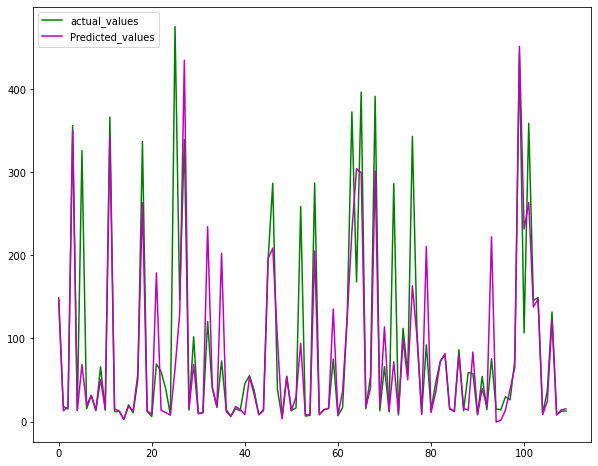

In [74]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [75]:
pm10 = data.drop('PM2.5(mcg/m³)', axis=1)
pm10 = pm10.drop('PM1(mcg/m³)', axis = 1)
pm10 = pm10.drop('Day', axis=1)

In [76]:
X_pm = pm10.drop('PM10(mcg/m³)', axis=1)
Y_pm = pm10['PM10(mcg/m³)']

In [77]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X_pm, Y_pm, test_size=0.25)


# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

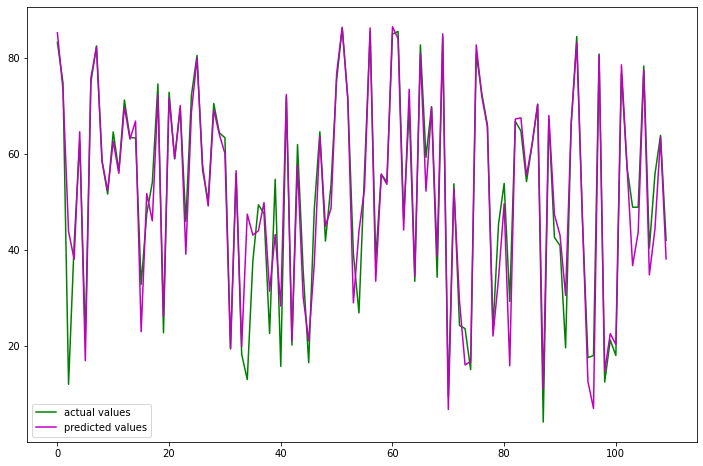

In [78]:
# Making predictions
reg_pred = model_reg.predict(X_test)


# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [79]:
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.9066019212988767


In [80]:
# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

catboost_pred = CatBoost_rg.predict(X_test)

Learning rate set to 0.034348
0:	learn: 22.4946701	total: 1.38ms	remaining: 1.37s
1:	learn: 21.9094445	total: 2.6ms	remaining: 1.3s
2:	learn: 21.3890138	total: 3.79ms	remaining: 1.26s
3:	learn: 20.8571387	total: 4.87ms	remaining: 1.21s
4:	learn: 20.2808759	total: 5.92ms	remaining: 1.18s
5:	learn: 19.7500278	total: 6.9ms	remaining: 1.14s
6:	learn: 19.2819810	total: 7.97ms	remaining: 1.13s
7:	learn: 18.8386550	total: 9.02ms	remaining: 1.12s
8:	learn: 18.3983925	total: 10.1ms	remaining: 1.11s
9:	learn: 18.0128433	total: 11.1ms	remaining: 1.1s
10:	learn: 17.5621362	total: 12.2ms	remaining: 1.1s
11:	learn: 17.1883073	total: 13.3ms	remaining: 1.09s
12:	learn: 16.7841372	total: 14.4ms	remaining: 1.09s
13:	learn: 16.3710760	total: 15.4ms	remaining: 1.08s
14:	learn: 16.0197273	total: 16.5ms	remaining: 1.09s
15:	learn: 15.6473609	total: 17.7ms	remaining: 1.09s
16:	learn: 15.2747038	total: 19ms	remaining: 1.1s
17:	learn: 14.9647798	total: 20.1ms	remaining: 1.09s
18:	learn: 14.6004150	total: 21.1m

308:	learn: 2.9035456	total: 353ms	remaining: 790ms
309:	learn: 2.8865683	total: 356ms	remaining: 793ms
310:	learn: 2.8757786	total: 358ms	remaining: 792ms
311:	learn: 2.8749564	total: 359ms	remaining: 791ms
312:	learn: 2.8607204	total: 360ms	remaining: 789ms
313:	learn: 2.8529672	total: 361ms	remaining: 788ms
314:	learn: 2.8481560	total: 362ms	remaining: 786ms
315:	learn: 2.8458108	total: 363ms	remaining: 785ms
316:	learn: 2.8405067	total: 364ms	remaining: 783ms
317:	learn: 2.8395793	total: 365ms	remaining: 782ms
318:	learn: 2.8290723	total: 366ms	remaining: 780ms
319:	learn: 2.8196548	total: 366ms	remaining: 779ms
320:	learn: 2.8113369	total: 368ms	remaining: 779ms
321:	learn: 2.8086208	total: 369ms	remaining: 777ms
322:	learn: 2.8019811	total: 370ms	remaining: 776ms
323:	learn: 2.7925783	total: 371ms	remaining: 774ms
324:	learn: 2.7864072	total: 372ms	remaining: 773ms
325:	learn: 2.7825778	total: 373ms	remaining: 771ms
326:	learn: 2.7771642	total: 374ms	remaining: 771ms
327:	learn: 

607:	learn: 1.7358147	total: 712ms	remaining: 459ms
608:	learn: 1.7322396	total: 714ms	remaining: 459ms
609:	learn: 1.7279486	total: 716ms	remaining: 458ms
610:	learn: 1.7266118	total: 717ms	remaining: 456ms
611:	learn: 1.7238656	total: 718ms	remaining: 455ms
612:	learn: 1.7196163	total: 719ms	remaining: 454ms
613:	learn: 1.7164049	total: 720ms	remaining: 453ms
614:	learn: 1.7159962	total: 721ms	remaining: 452ms
615:	learn: 1.7154350	total: 723ms	remaining: 450ms
616:	learn: 1.7150371	total: 724ms	remaining: 449ms
617:	learn: 1.7147628	total: 725ms	remaining: 448ms
618:	learn: 1.7120875	total: 726ms	remaining: 447ms
619:	learn: 1.7099623	total: 727ms	remaining: 446ms
620:	learn: 1.7081554	total: 728ms	remaining: 444ms
621:	learn: 1.7071441	total: 729ms	remaining: 443ms
622:	learn: 1.7035713	total: 730ms	remaining: 442ms
623:	learn: 1.7032984	total: 731ms	remaining: 440ms
624:	learn: 1.7018257	total: 732ms	remaining: 439ms
625:	learn: 1.6987194	total: 733ms	remaining: 438ms
626:	learn: 

766:	learn: 1.3600988	total: 892ms	remaining: 271ms
767:	learn: 1.3575654	total: 894ms	remaining: 270ms
768:	learn: 1.3550345	total: 896ms	remaining: 269ms
769:	learn: 1.3540824	total: 897ms	remaining: 268ms
770:	learn: 1.3524322	total: 899ms	remaining: 267ms
771:	learn: 1.3483158	total: 901ms	remaining: 266ms
772:	learn: 1.3466659	total: 903ms	remaining: 265ms
773:	learn: 1.3433170	total: 906ms	remaining: 264ms
774:	learn: 1.3407372	total: 907ms	remaining: 263ms
775:	learn: 1.3387701	total: 909ms	remaining: 262ms
776:	learn: 1.3353526	total: 910ms	remaining: 261ms
777:	learn: 1.3325793	total: 912ms	remaining: 260ms
778:	learn: 1.3286386	total: 914ms	remaining: 259ms
779:	learn: 1.3277664	total: 915ms	remaining: 258ms
780:	learn: 1.3249814	total: 916ms	remaining: 257ms
781:	learn: 1.3222170	total: 918ms	remaining: 256ms
782:	learn: 1.3203389	total: 919ms	remaining: 255ms
783:	learn: 1.3192581	total: 920ms	remaining: 254ms
784:	learn: 1.3163344	total: 924ms	remaining: 253ms
785:	learn: 

999:	learn: 0.9615437	total: 1.25s	remaining: 0us


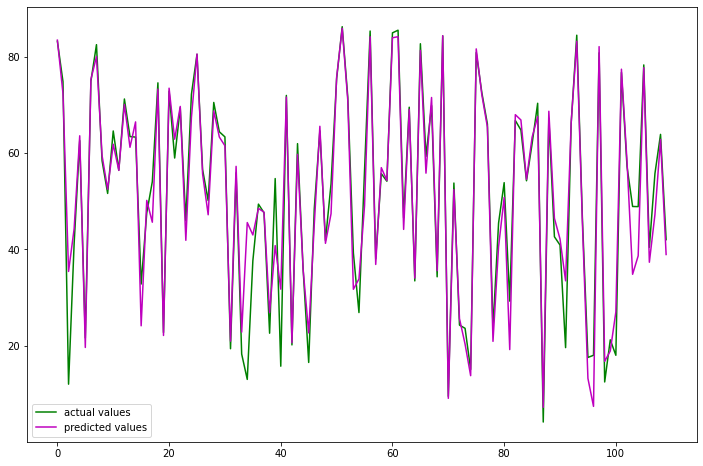

In [81]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [82]:
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.928681873609883


In [83]:
# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
   
                             # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 67.0274 - mae: 67.0274
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 54.9908 - mae: 54.9908
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 43.0725 - mae: 43.0725
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 33.0225 - mae: 33.0225
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 27.2124 - mae: 27.2124
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 25.4656 - mae: 25.4656
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 23.6919 - mae: 23.6919
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 21.9199 - mae: 21.9199
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 20.1942 - mae: 20.1942
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 18.6343 - mae: 18.6343
Epoch 11/200
11/11 [===================

11/11 [==============================] - 0s 3ms/step - loss: 3.9500 - mae: 3.9500
Epoch 88/200
11/11 [==============================] - 0s 3ms/step - loss: 3.9855 - mae: 3.9855
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 3.9788 - mae: 3.9788
Epoch 90/200
11/11 [==============================] - 0s 3ms/step - loss: 3.9826 - mae: 3.9826
Epoch 91/200
11/11 [==============================] - 0s 3ms/step - loss: 3.9726 - mae: 3.9726
Epoch 92/200
11/11 [==============================] - 0s 3ms/step - loss: 4.0184 - mae: 4.0184
Epoch 93/200
11/11 [==============================] - 0s 3ms/step - loss: 3.9587 - mae: 3.9587
Epoch 94/200
11/11 [==============================] - 0s 3ms/step - loss: 3.9683 - mae: 3.9683
Epoch 95/200
11/11 [==============================] - 0s 2ms/step - loss: 4.2175 - mae: 4.2175
Epoch 96/200
11/11 [==============================] - 0s 3ms/step - loss: 4.0627 - mae: 4.0627
Epoch 97/200
11/11 [==============================] - 0s 3ms/st

11/11 [==============================] - 0s 2ms/step - loss: 3.8111 - mae: 3.8111
Epoch 173/200
11/11 [==============================] - 0s 3ms/step - loss: 3.8058 - mae: 3.8058
Epoch 174/200
11/11 [==============================] - 0s 3ms/step - loss: 3.8315 - mae: 3.8315
Epoch 175/200
11/11 [==============================] - 0s 3ms/step - loss: 3.7922 - mae: 3.7922
Epoch 176/200
11/11 [==============================] - 0s 3ms/step - loss: 3.7915 - mae: 3.7915
Epoch 177/200
11/11 [==============================] - 0s 3ms/step - loss: 3.7751 - mae: 3.7751
Epoch 178/200
11/11 [==============================] - 0s 3ms/step - loss: 3.9146 - mae: 3.9146
Epoch 179/200
11/11 [==============================] - 0s 3ms/step - loss: 3.9216 - mae: 3.9216
Epoch 180/200
11/11 [==============================] - 0s 3ms/step - loss: 3.8871 - mae: 3.8871
Epoch 181/200
11/11 [==============================] - 0s 3ms/step - loss: 3.8350 - mae: 3.8350
Epoch 182/200
11/11 [==============================] -

In [84]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

4/4 [==============================] - 0s 2ms/step
R score is : 0.9166023232123464


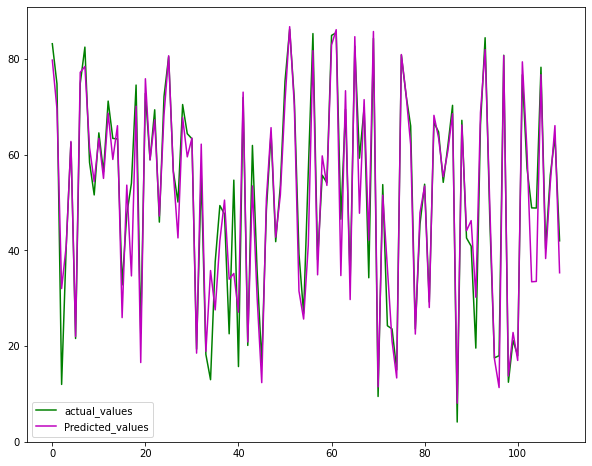

In [85]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()